<a href="https://colab.research.google.com/github/JABINOGANGA/Moringa-CORE---WK2-Jabin-Oganga-IP/blob/main/Copy_of_Jabin_Oganga_Core_Week2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State of Financial Inclusion in East Africa (Kenya, Uganda, Tanzania & Rwanda)



> ## 1. Defining the Analytical Questions 



#### a) Specifying The Data analytical question

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

#### b) Defining the Metrics of Success

The project will be a success if it is able to predict the individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda while at the same time provide insights into key demographic factors that might drive individuals’ financial outcomes.


#### c) Understanding the Context

Access to bank accounts has been regarded as an indicator of financial inclusion. In Africa most adults don't have access to or use a commercial bank account. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account. This study seeks to provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda,by predicting which individuals are most likely to have or use a bank account. The study will also provide insights into some of the key demographic factors that might drive individuals’ financial outcomes.


####  Recording Experimental Design 

In this study, we will be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables hence coming up with a prediction on individuals who are most likely to have or use a bank account


#### Data Relevance

The data provided is for the year 2016 to 2018 for all the countries in our study, i.e(Kenya, Rwanda, Tanzania, and Uganda) which will enable us come up with trends to depict which group of people are likely to have a bank account. The data also contains important variables such as Gender, Education level, Age, Has a bank account, Job type which are very useful in determining whether the different groups have access to a bank account or not.


## 2. Loading Relevant Libraries & Datasets


In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
def read(url):
  dataset = pd.read_csv(url)
  return dataset

east = read('http://bit.ly/FinancialDataset')
east.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Previewing the lower part of the data
east.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


## 3. Checking Our Data


In [ ]:
# Determining the no. of records in our dataset, name of columns & data types
#
def info(data):
  dtype = data.dtypes
  dshape = data.shape
  dcolumns = data.columns

  return dtype , dshape, dcolumns

info(east)


(country                    object
 year                        int64
 uniqueid                   object
 Has a Bank account         object
 Type of Location           object
 Cell Phone Access          object
 household_size            float64
 Respondent Age            float64
 gender_of_respondent       object
 The relathip with head     object
 marital_status             object
 Level of Educuation        object
 Type of Job                object
 dtype: object,
 (23524, 13),
 Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
        'Cell Phone Access', 'household_size', 'Respondent Age',
        'gender_of_respondent', 'The relathip with head', 'marital_status',
        'Level of Educuation', 'Type of Job'],
       dtype='object'))

In [ ]:
#Check for basic descriptive statistics for the numeric columns
east.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


## 4. Tyding Our Dataset


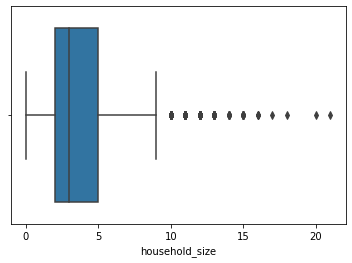

In [ ]:
# Checking for Outliers using boxplot 
sns.boxplot(x=east['household_size']

In [ ]:
# Getting rid of Outliers detected to help clean our data and increase quality of analysis and future prediction accuracy
unique_values = east['household_size'].unique()
max_thresh = east['household_size'].quantile(0.95)
east = east[east['household_size']<= max_thresh]

print(unique_values)
print(east['household_size'].unique())

[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
[3. 5. 8. 7. 1. 6. 4. 2. 0.]


Text(0, 0.5, 'Year')

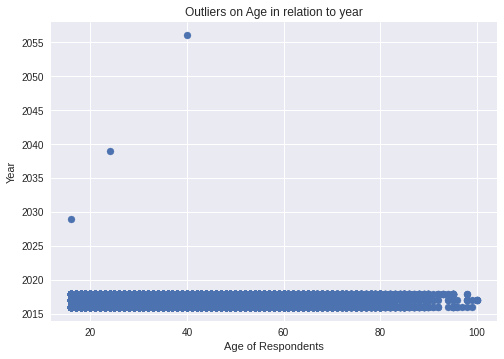

In [ ]:
# Checking for outliers using scatter plots
plt.style.use('seaborn')

plt.scatter(x=east['Respondent Age'], y = east['year'] )
plt.title('Outliers on Age in relation to year')
plt.xlabel('Age of Respondents')
plt.ylabel('Year')


In [ ]:
#Removing outliers in the year column
outliers = east[east['year'] > 2018].index
east.drop(outliers , inplace=True)


In [ ]:
east = east.drop(['uniqueid'], axis = 1)
east.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# Formatting our columns to category to improve compatibility while using them for them to be used easily in data analysis 
east['country'] = east['country'].astype('category')
east['Has a Bank account'] = east['Has a Bank account'].astype('category')
east['Type of Location'] = east['Type of Location'].astype('category')
east['gender_of_respondent'] = east['gender_of_respondent'].astype('category')
east['Level of Educuation'] = east['Level of Educuation'].astype('category') 
east['Type of Job'] = east['Type of Job'].astype('category')
east['The relathip with head'] = east['The relathip with head'].astype('category')
east['marital_status'] = east['marital_status'].astype('category')
east['Cell Phone Access'] = east['Cell Phone Access'].astype('category')
east['year'] = pd.to_datetime(east['year']) 
east.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22760 entries, 0 to 23522
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 22746 non-null  category      
 1   year                    22760 non-null  datetime64[ns]
 2   Has a Bank account      22724 non-null  category      
 3   Type of Location        22745 non-null  category      
 4   Cell Phone Access       22749 non-null  category      
 5   household_size          22760 non-null  float64       
 6   Respondent Age          22735 non-null  float64       
 7   gender_of_respondent    22731 non-null  category      
 8   The relathip with head  22760 non-null  category      
 9   marital_status          22733 non-null  category      
 10  Level of Educuation     22732 non-null  category      
 11  Type of Job             22731 non-null  category      
dtypes: category(9), datetime64[ns](1), float64(2)


In [ ]:
#Dropping all the Null values 
east = east.dropna(axis=0, inplace=False)
east.isnull().sum()

country                   0
year                      0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

## 5. Exploratory Analysis

#### Measure of Central Tendencies & Dispersion



In [ ]:
#Get min, max and range of the household size and age of respondents
#for age
minimum = east['Respondent Age'].min()
print(minimum)
maximum = east['Respondent Age'].max()
print(maximum)
range_age = maximum - minimum
print(range_age)
#For household size
min = east['household_size'].min()
print(min)
max = east['household_size'].max()
print(max)
range_household = max - min
print(range_household)

16.0
100.0
84.0
0.0
8.0
8.0


In [ ]:
# Calculating the mean of age of respondents and size of households(Measure of Central Tendency)
east.mean()
print(east.mean())


household_size     3.481690
Respondent Age    38.901681
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Calculating the mode of age of respondents and size of households(Measure of Central Tendency)
mode1 = east['household_size'].mode()
mode2 = east['Respondent Age'].mode()

print(mode1)
print(mode2)

0    2.0
dtype: float64
0    30.0
dtype: float64


In [ ]:
# Calculating the median of age of respondents and size of households(Measure of Central Tendency)
east.median()
print(east.median())

household_size     3.0
Respondent Age    35.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [ ]:
# Measure of dispersion
st = east.std()
print(st)
skew = east.skew()
print(skew)
kurt = east.kurtosis()
print(kurt)

household_size     1.980989
Respondent Age    16.565513
dtype: float64
household_size    0.524425
Respondent Age    0.846072
dtype: float64
household_size   -0.717358
Respondent Age    0.092212
dtype: float64


#### **Univariate Analysis**


In [ ]:
east.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,1970-01-01 00:00:00.000002018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,1970-01-01 00:00:00.000002018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,1970-01-01 00:00:00.000002018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,1970-01-01 00:00:00.000002018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,1970-01-01 00:00:00.000002018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
bank_acc = east.loc[east['Has a Bank account']== 'Yes'].groupby('country')['Has a Bank account'].value_counts()
bank_acc

country   Has a Bank account
Kenya     Yes                   1488
Rwanda    Yes                    964
Tanzania  Yes                    599
Uganda    Yes                    164
Name: Has a Bank account, dtype: int64

In [ ]:
east.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

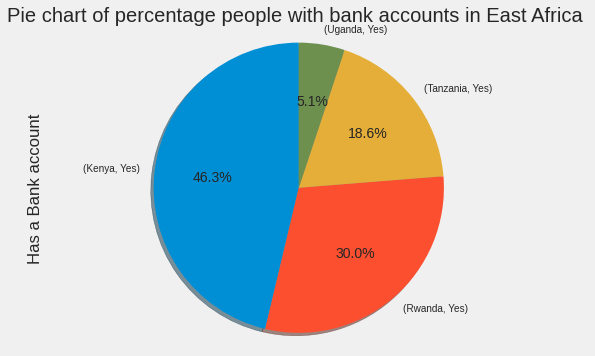

In [ ]:
#pie chart for countries with people with bank accounts
bank_acc.plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart of percentage people with bank accounts in East Africa ')
plt.show()
#We can conclude that Kenya has the highest number of people with bank accounts in this study
#at 46.3% and Uganda the lowest at 5.1%

In [ ]:
phone_acc = east.loc[east['Cell Phone Access']== 'Yes'].groupby('country')['Cell Phone Access'].value_counts()
phone_acc

country   Cell Phone Access
Kenya     Yes                  4609
Rwanda    Yes                  6990
Tanzania  Yes                  3883
Uganda    Yes                  1305
Name: Cell Phone Access, dtype: int64

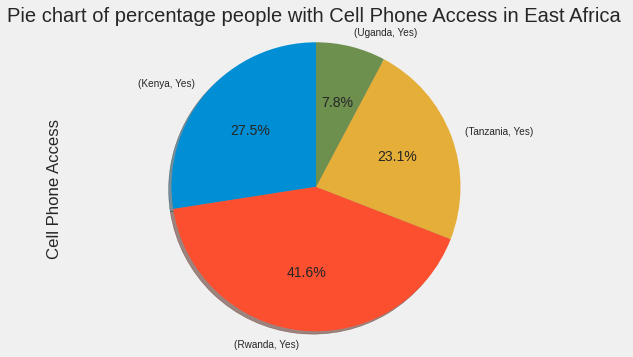

In [ ]:
#pie chart for countries
phone_acc.plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart of percentage people with Cell Phone Access in East Africa ')
plt.show()
#We can conclude that Rwanda has the highest number of respondents in this study
#at 41.6% and Uganda the lowest at 7.8%

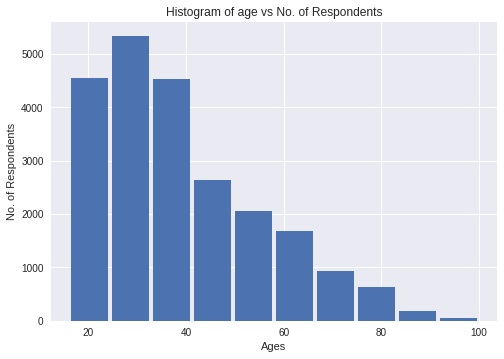

In [ ]:
#Plotting a age histogram
age = east['Respondent Age']

plt.hist(age, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Ages')
plt.ylabel('No. of Respondents')
plt.title('Histogram of age vs No. of Respondents')
plt.show()
#We can conclude that the greater population in the dataset is between the ages
# of 20 and 40.

#### **Observations**

#### 1. Kenya has the Highest No. of people with bank accounts followed by Rwanda, Tanzania & Uganda
#### 2. Despite the fact that Kenya has people with more bank account Rwanda has a lot of people with access to phones which can also be used for money transactions.
#### 3. Most of the respondents are of the age between 20 - 40yrs 


#### **Bivariate Analysis**


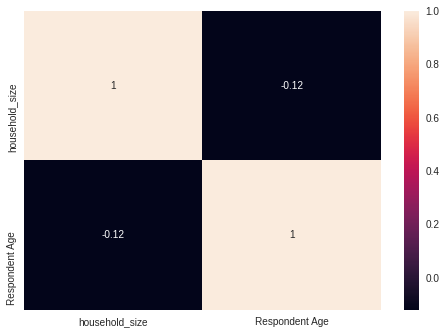

In [ ]:
# Heatmap showing correlation between the two float format columns age of  respondents and household_size
sns.heatmap(east.corr(),annot=True)
plt.show()

In [ ]:
female = east.loc[east['gender_of_respondent']== 'Female'].groupby('country')['gender_of_respondent'].value_counts()
female

country   gender_of_respondent
Kenya     Female                  3354
Rwanda    Female                  5038
Tanzania  Female                  3730
Uganda    Female                  1227
Name: gender_of_respondent, dtype: int64

In [ ]:
male = east.loc[east['gender_of_respondent']== 'Male'].groupby('country')['gender_of_respondent'].value_counts()
male

country   gender_of_respondent
Kenya     Male                    2468
Rwanda    Male                    3402
Tanzania  Male                    2760
Uganda    Male                     631
Name: gender_of_respondent, dtype: int64

In [ ]:
female_acc = east.loc[east['Has a Bank account']== 'Yes'].groupby('gender_of_respondent')['Has a Bank account'].value_counts()
female_acc

gender_of_respondent  Has a Bank account
Female                Yes                   1446
Male                  Yes                   1769
Name: Has a Bank account, dtype: int64

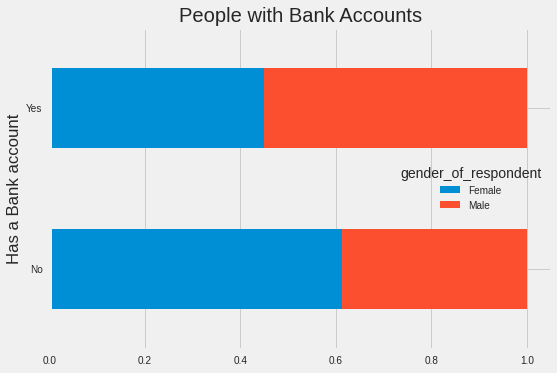

In [ ]:
# Horizontal bargraph on people with bank accounts in relation to their gender
ex = east.groupby('Has a Bank account')['gender_of_respondent'].value_counts(normalize=True).unstack()
ex.plot(kind='barh', stacked='True',title = 'People with Bank Accounts')


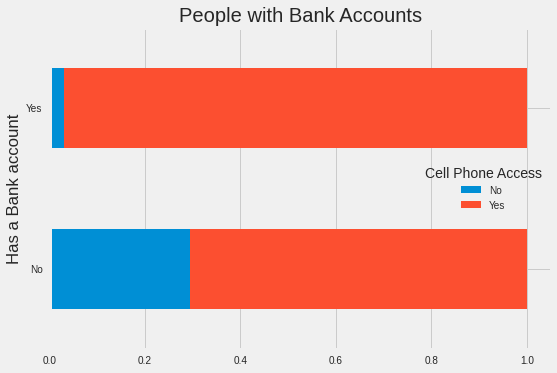

In [ ]:
# Horizontal bargraph on people with bank accounts in relation to their gender
px = east.groupby('Has a Bank account')['Cell Phone Access'].value_counts(normalize=True).unstack()
px.plot(kind='barh', stacked='True',title = 'People with Bank Accounts')

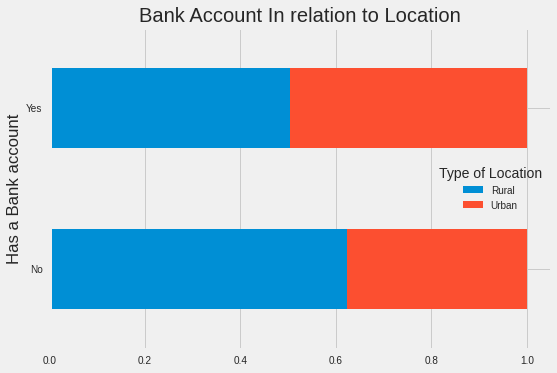

In [ ]:
# Horizontal bargraph on people with bank accounts in relation to their location
px = east.groupby('Has a Bank account')['Type of Location'].value_counts(normalize=True).unstack()
px.plot(kind='barh', stacked='True',title = 'Bank Account In relation to Location')

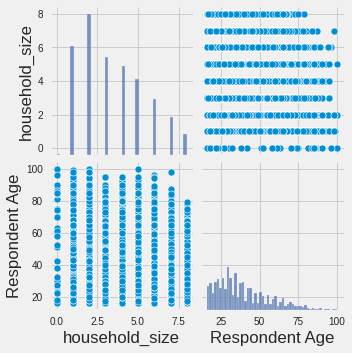

In [ ]:
#  Plotting Bivariate analysis and recording observations
sns.pairplot(east)

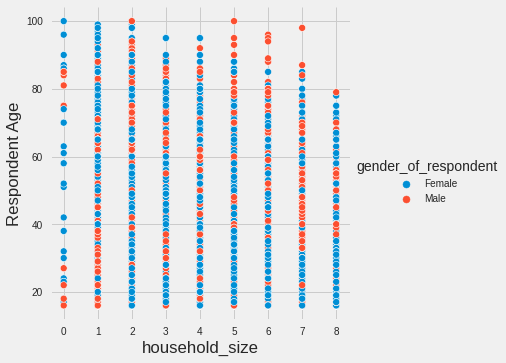

In [ ]:
#  Scatter plot showing the realtionship between gender age and household size
sns.relplot( x = 'household_size', y = 'Respondent Age', data = east, hue = 'gender_of_respondent', kind = 'scatter')
plt.show()

####**Observations**
1. A lot of people with cellphone connections have bank accounts
2. A lot of the residents living in urban areas have bank accounts compared to those living in rural areas
3. The male population have more bank accounts to the female population 
4. There is no relation between the size of household and the gender of the respondents but there is a connection between the age of the respondents the size of households


#### **Multivariate Analysis**

### Reduction Techniques

In [ ]:
east.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
#  Collecting the numerical columns from our dataset as reduction can only be done on numerical data 
x = east.iloc[:, 5:6].values
y = east.iloc[:, 2].values
x
y


['Yes', 'No', 'Yes', 'No', 'No', ..., 'No', 'No', 'No', 'No', 'No']
Length: 22610
Categories (2, object): ['No', 'Yes']

In [ ]:
#  Importing sklearn and selectiong the dataset to use on testing the algorithm 20% and the training dataset 80%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)
print(x_test)
print(x_train)

[[-0.74899708]
 [-0.2450782 ]
 [-0.2450782 ]
 ...
 [ 0.25884069]
 [ 1.77059735]
 [-0.74899708]]
[[-0.74899708]
 [ 0.25884069]
 [-1.25291597]
 ...
 [ 0.25884069]
 [-0.74899708]
 [ 1.26667846]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
#  Perfoming an accuracy test 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

#  Our accuracy came out as 84% which is really good

[[3819    0]
 [ 703    0]]
Accuracy0.8445378151260504


## 6. Challenging the solution

> FinAccess Kenya 2018. https://fsdkenya.org/publication/finaccess2019/ 

> Finscope Rwanda 2016. http://www.statistics.gov.rw/publication/finscope-rwanda-2016

> Finscope Tanzania 2017. http://www.fsdt.or.tz/finscope/

> Finscope Uganda 2018. http://fsduganda.or.ug/finscope-2018-survey-report/

> **The links attached have onformation that can be used to critisize analysis made in this study**











## 7. Follow up questions


**a). Did we have the right data?**

The Data used managed to answer the research Questions

**b). Did we need another dataset to answer the question?**

The data in itself was quite conclusive so it managed well

**c). Did we have the right Question?**

Yes we did.




